## Importando bibliotecas

In [158]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [90]:
plt.style.use('fivethirtyeight')
warnings.simplefilter("ignore")

## Buscando dados

In [19]:
#Preço de fechamento do IBOVESPA

ibov = yf.download('^BVSP', start='2019-12-11', end='2020-12-12')[['Adj Close', 'Close']]

ibov = pd.DataFrame(ibov['Adj Close'])
ibov.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2019-12-11,110964.0
2019-12-12,112200.0
2019-12-13,112565.0
2019-12-16,111896.0
2019-12-17,112616.0


In [21]:
#Renomeando a coluna

ibov.rename(columns={'Adj Close':'IBOVESPA'}, inplace=True)
ibov.head()

,IBOVESPA
Date,
2019-12-11,110964.0
2019-12-12,112200.0
2019-12-13,112565.0
2019-12-16,111896.0
2019-12-17,112616.0


In [33]:
#Algumas métricas estatísticas

ibov.describe()

,IBOVESPA
count,249.000000
mean,98589.064257
std,13439.782563
min,63570.000000
25%,93531.000000
50%,100440.000000
75%,108888.000000
max,119528.000000


In [30]:
#Calculando o log-retorno simples IBOVESPA

retorno_simples = np.log(ibov / ibov.shift())[1:]
retorno_simples.head()

,IBOVESPA
Date,
2019-12-12,0.011077
2019-12-13,0.003248
2019-12-16,-0.005961
2019-12-17,0.006414
2019-12-18,0.014974


In [95]:
#Algumas métricas estatísticas

retorno_simples.describe()

,IBOVESPA
count,248.000000
mean,0.000155
std,0.028623
min,-0.159930
25%,-0.011590
50%,0.000688
75%,0.013938
max,0.130223


In [132]:
#Cauda superior e inferior:

cauda_sup = np.round(np.mean(retorno_simples) + np.std(retorno_simples) * 3, 4) * 100
cauda_inf = np.round(np.mean(retorno_simples) + np.std(retorno_simples) * (-3), 4) * 100

print(f'Assumindo que os retornos diários do Ibovespa possuem distribuição normal, pode-se afirmar que 99.74% das observações estiveram entre {cauda_inf[0]}% e {cauda_sup[0]}%.')

Assumindo que os retornos diários do Ibovespa possuem distribuição normal, pode-se afirmar que 99.74% das observações estiveram entre -8.55% e 8.59%.


In [134]:
# z = Média - Média da série / Desvio padrão da série

zscore = 0 - np.mean(retorno_simples / np.std(retorno_simples))
zscore

IBOVESPA   -0.005439
dtype: float64

In [163]:
#Probabilidade 

z = zscore

prob = np.round(stats.norm.cdf(z), 3) * 100
prob

print(f'A probabilidade dos retornos negativos durante a série analisada foi de {prob[0]}% e a probalidade de retornos positivos foi de {100 - prob[0]}%.')

A probabilidade dos retornos negativos durante a série analisada foi de 49.8% e a probalidade de retornos positivos foi de 50.2%.


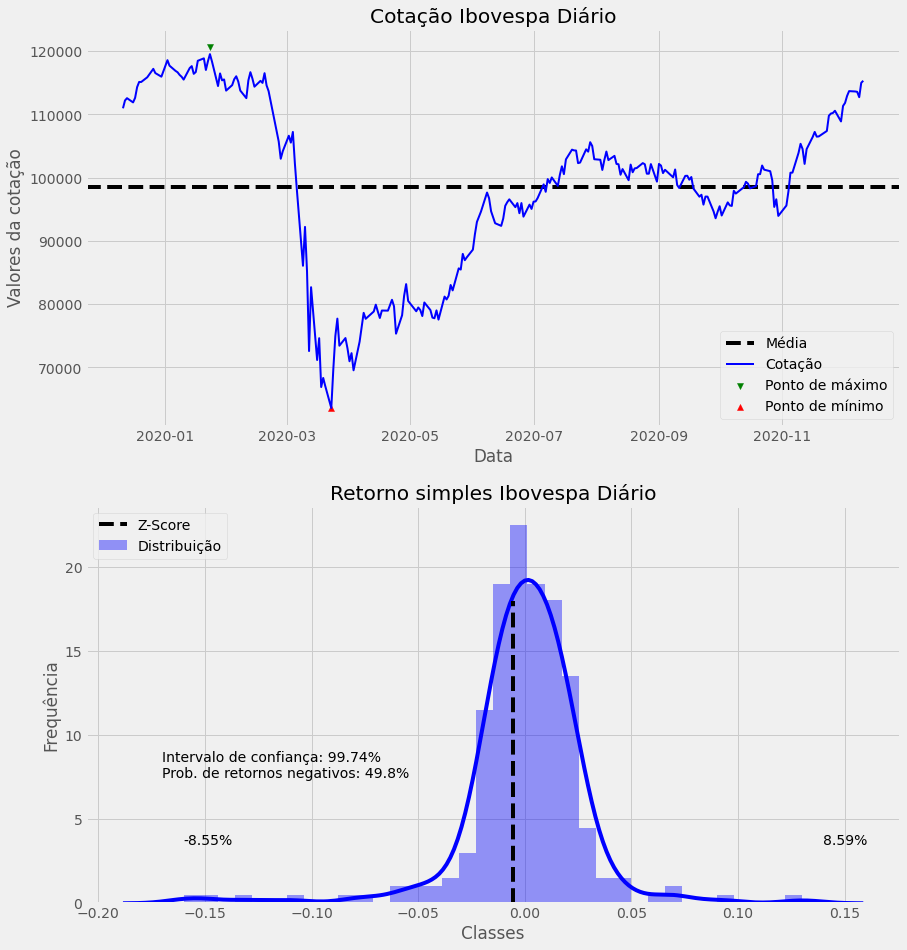

In [242]:
#Visualização

plt.figure(figsize=(13, 15));
plt.subplot(211);
plt.title('Cotação Ibovespa Diário');
plt.scatter(np.datetime64('2020-01-23'), ibov.max() * 1.01, marker='v', color='green', label='Ponto de máximo');
plt.scatter(np.datetime64('2020-03-23'), ibov.min() * 1.0000003, marker='^', color='red', label='Ponto de mínimo');
plt.axhline(y=98589.064257, color='black', linestyle='--', label='Média');
plt.plot(ibov, label='Cotação', color='blue', linewidth=2);
#plt.scatter(ibov.max(), color='green');
plt.xlabel('Data');
plt.ylabel('Valores da cotação');
plt.legend(loc=4);

plt.subplot(212);
sns.distplot(retorno_simples, color='blue', label='Distribuição');
#plt.scatter(zscore, 0.2, color='black')
plt.axvline(x=-0.005439, ymax=0.76, color='black', linestyle='--', label='Z-Score');
plt.title('Retorno simples Ibovespa Diário');
plt.ylabel('Frequência');
plt.xlabel('Classes');
plt.text(-0.16, 3.5, f'{cauda_inf[0]}%');
plt.text(0.14, 3.5, f'{cauda_sup[0]}% ');
plt.text(-0.17, 7.5, f'Intervalo de confiança: 99.74%\nProb. de retornos negativos: {prob[0]}%');
plt.legend(loc=2);


SCRIPT FINALIZADO!